<p style = "font-size : 50px; color :  #000000 ; font-family : 'Comic Sans MS'; text-align : center; background-color :#FFFF00 ; border-radius: 5px 5px;"><strong>Fake News 📰 Classification - NLP</strong></p> 



<img style="float: center;  border:5px solid #DC143C; width:75%" src = https://miro.medium.com/max/1320/1*VIEVy548fut8IJotJlQKSQ.jpeg>

<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Introduction</strong></p>


<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong></strong>In the following analysis, we will talk about how one can create an NLP to detect whether the news is real or fake. Nowadays, fake news has become a common trend. Even trusted media houses are known to spread fake news and are losing their credibility. So, how can we trust any news to be real or fake?</p>



<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Dataset</strong></p>

<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong></strong>1. train.csv: A full training dataset with the following attributes:</p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong></strong>2. id: unique id for a news article.</p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong></strong>3. title: the title of a news article.</p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong></strong>4. author: author of the news article.</p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong></strong>5. text: the text of the article; could be incomplete.</p>
<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong></strong>6. label: a label that marks the article as potentially unreliable. Where 1: unreliable and 0: reliable.</p>




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Ignore warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv


<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Importing Libraries</strong></p>

In [2]:
# Modelling Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

# Computations
import itertools

# Visualization
import matplotlib.pyplot as plt

<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Loading Dataset</strong></p>

In [3]:
train = pd.read_csv("../input/fake-news/train.csv")
test  = pd.read_csv ("../input/fake-news/test.csv")
submit  = pd.read_csv ("../input/fake-news/submit.csv")

In [4]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
print(f"Train Shape : {train.shape}")
print(f"Test Shape : {test.shape}")
print(f"Submit Shape : {submit.shape}")

Train Shape : (20800, 5)
Test Shape : (5200, 4)
Submit Shape : (5200, 2)


<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Data Preprocessing</strong></p>

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
train.dtypes.value_counts()

object    3
int64     2
dtype: int64

<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Handle missing values :-</strong></p>

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>If model is trained on a concatenation of the title, the author and the main text, the model would be more generalized because adding more words to the input might increase the reliablity of the model.</strong></p>

In [9]:
test=test.fillna(' ')
train=train.fillna(' ')

In [10]:
# Create a column with all the data available
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']

In [11]:
# Have a glance at our training set
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
 5   total   20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [12]:
# Dividing the training set by using train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['total'], train.label, test_size=0.20, random_state=0)

<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Vectorizing our Data</strong></p>

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization.</strong></p>

![0*qTIL0VGKFsQy6TtA](https://miro.medium.com/max/1536/0*qTIL0VGKFsQy6TtA)

<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>1. Count Vectorizer </strong></p> 

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.</strong></p>

![vectorchart.PNG](https://res.cloudinary.com/practicaldev/image/fetch/s--qveZ_g7d--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://raw.githubusercontent.com/cassieview/intro-nlp-wine-reviews/master/imgs/vectorchart.PNG)

In [13]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english') 
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set 
count_test = count_vectorizer.transform(X_test)

<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong> 2. Tf-IDF Vectorizer </strong></p> 

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.</strong></p>



![1*qQgnyPLDIkUmeZKN2_ZWbQ.png](https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [14]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong> Using Suitable ML models with Count Vectorizer and TF-IDF Vectorizer</strong></p>


<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong> 1. Multinomial Naive Bayes with Count Vectorizer (BagofWords) </strong></p> 


![bagword_omdrsi.png](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1507674699/bagword_omdrsi.png)


In [15]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)
print(acc_nb_count)

0.942548076923077


In [16]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.91106
Alpha: 0.05 Score: 0.94183
Alpha: 0.10 Score: 0.94255
Alpha: 0.15 Score: 0.94279
Alpha: 0.20 Score: 0.94231
Alpha: 0.25 Score: 0.94111
Alpha: 0.30 Score: 0.93990
Alpha: 0.35 Score: 0.93822
Alpha: 0.40 Score: 0.93750
Alpha: 0.45 Score: 0.93630
Alpha: 0.50 Score: 0.93510
Alpha: 0.55 Score: 0.93486
Alpha: 0.60 Score: 0.93341
Alpha: 0.65 Score: 0.93149
Alpha: 0.70 Score: 0.93029
Alpha: 0.75 Score: 0.92909
Alpha: 0.80 Score: 0.92788
Alpha: 0.85 Score: 0.92644
Alpha: 0.90 Score: 0.92428
Alpha: 0.95 Score: 0.92308


<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>The best score is obtained for alpha = 0.15, and is equal to 0.94279.</strong></p>


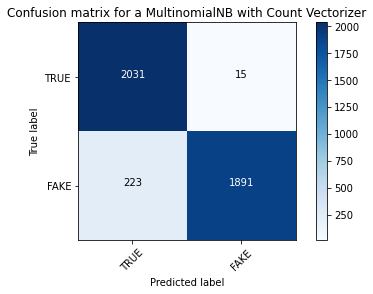

In [17]:
# Let's re-run our fine-tuned model and plot the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])

# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong> We see that although our model has a general accuracy of 94.3 %, which is good, but it does not really score well in view of number of false negative. 223 fake news are classified as true news with this model, which is not pleasing to see. So we will try to use the Tf-IDF vectorizer on this same model to see if it performs better.</strong></p>


<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong> 2. Multinomial Naive Bayes with TF-IDF Vectorizer </strong></p> 
 

In [18]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_tfidf)

0.926923076923077


In [19]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

Alpha: 0.00  Score: 0.90649
Alpha: 0.01  Score: 0.94375
Alpha: 0.02  Score: 0.94375
Alpha: 0.03  Score: 0.94159
Alpha: 0.04  Score: 0.93966
Alpha: 0.05  Score: 0.93822
Alpha: 0.06  Score: 0.93462
Alpha: 0.07  Score: 0.93317
Alpha: 0.08  Score: 0.93005
Alpha: 0.09  Score: 0.92861


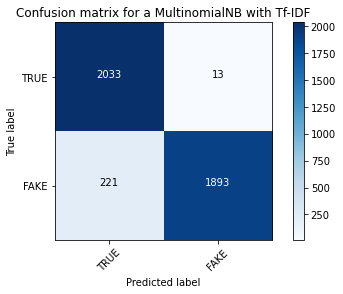

In [20]:
# Let's run the optimized model with best value of hyperparameter and check the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong> This confusion matrix above confirms that this new model is slightly better (and its accuracy score is 94.4 %). However, too many fake news are still labeled as true news. Let's try with another model called PassiveAgressive Classifier which is special for text classification purposes.</strong></p>


<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>  3. Passive Agressive Classifier With Count Vectorizer </strong></p> 



0.9673076923076923


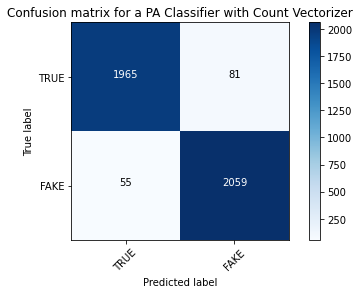

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(count_train, y_train)
pred_linear_count = linear_classifier.predict(count_test)
acc_linear_count = metrics.accuracy_score(y_test, pred_linear_count)
print(acc_linear_count)
cm6 = metrics.confusion_matrix(y_test, pred_linear_count, labels=[0,1])
plot_confusion_matrix(cm6, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Count Vectorizer')

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>We get much better results than with the MultinomialNB model, both in terms of accuracy and in terms of false negative. Only 60 fake news were labeled as true news this time. Let's try with the Tf-IDF method. </strong></p>



<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>  4. Passive Agressive Classifier With TF-IDF Vectorizer </strong></p> 



0.9805288461538462


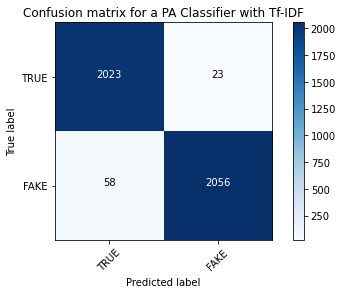

In [22]:
linear_classifier = PassiveAggressiveClassifier(max_iter=10)
linear_classifier.fit(tfidf_train, y_train)
pred_linear_tfidf = linear_classifier.predict(tfidf_test)
acc_linear_tfidf = metrics.accuracy_score(y_test, pred_linear_tfidf)
print(acc_linear_tfidf)
cm5 = metrics.confusion_matrix(y_test, pred_linear_tfidf, labels=[0,1])
plot_confusion_matrix(cm5, classes=['TRUE','FAKE'], title ='Confusion matrix for a PA Classifier with Tf-IDF')

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>Although we observe more false negative, the overall accuracy is much better, hence so far this is our best model. Let's try with Logistic Regression now!</strong></p>



<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>  5. Logistic Regression with TF-IDF Vectorizer </strong></p> 



0.9800480769230769


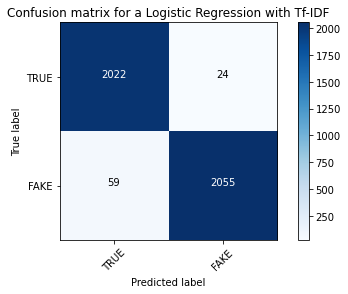

In [23]:
logreg = LogisticRegression(C=1e5)
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print(acc_logreg_tfidf)
cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

<p style = "font-size : 20px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong>This model has a very high accuracy score, and only 58 records were misclassified. So far, Logistic Regression played it best ! Let's see the same with CountVectorizer ie. Bag of Words concept.</strong></p>



<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>   6. Logistic Regression with CountVectorizer </strong></p> 


0.9776442307692308


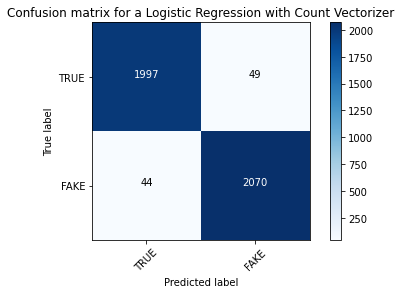

In [24]:
logreg = LogisticRegression(C=1e5)
logreg.fit(count_train, y_train)
pred_logreg_count = logreg.predict(count_test)
acc_logreg_count = metrics.accuracy_score(y_test,pred_logreg_count)
print(acc_logreg_count)
cm3 = metrics.confusion_matrix(y_test, pred_logreg_count, labels=[0,1])
plot_confusion_matrix(cm3, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Count Vectorizer')

<p style = "font-size : 25px; color : #8cff32 ; font-family : 'Comic Sans MS';  "><strong>It's THE BEST MODEL YAY ! This is our favorite model so far. Indeed, even though the accuracy score is a bit lower, we have less fake news labeled as true news ie. only 44. Therefore, I choose this model because it seems to maximize the accuracy while minimizing the false negative rate!</strong></p>

